# Final Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from tensorflow import keras
import os
import re
from sklearn.metrics import accuracy_score
from keras.layers import Embedding
from keras import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dropout
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.layers import Flatten
from keras.layers import Input
from keras.models import Model
import warnings
warnings.filterwarnings('ignore')

### 1. Text Classification

In [2]:
# import data
path = "../data/neg" 
files= os.listdir(path)

neg = []
for file in files:
    position = path+'/'+ file

    with open(position, "r") as f:
        data = f.read()
        neg.append(data)
#neg = ','.join(neg)

In [3]:
path = "../data/pos" 
files= os.listdir(path)

pos = []
for file in files:
    position = path+'/'+ file

    with open(position, "r") as f:
        data = f.read()
        pos.append(data)
#pos = ','.join(pos)

### (b) Data Exploration and Pre-processing

##### i. You can use binary encoding for the sentiments , i.e y = 1 for positive sentiments and y = −1 for negative sentiments.

In [4]:
df_pos = pd.DataFrame(pos)
df_pos['y'] = 1
df_neg = pd.DataFrame(neg)
df_neg['y'] = -1

In [5]:
pd.concat([df_pos,df_neg],axis = 0).reset_index().drop('index', axis=1)

,0,y
0,assume nothing . \nthe phrase is perhaps one o...,1
1,plot : derek zoolander is a male model . \nhe ...,1
2,i actually am a fan of the original 1961 or so...,1
3,a movie that's been as highly built up as the ...,1
4,""" good will hunting "" is two movies in one : ...",1
...,...,...
1995,synopsis : when a meteorite crashlands in the ...,-1
1996,it's now the anniversary of the slayings of ju...,-1
1997,coinciding with the emerging popularity of mov...,-1
1998,and now the high-flying hong kong style of fil...,-1


##### ii. The data are pretty clean. Remove the punctuation and numbers from the data.

In [6]:
neg = ','.join(neg)
neg_no_num = re.sub('\d', '', neg)
neg_process = re.sub('\W', ' ', neg_no_num)

In [7]:
pos = ','.join(pos)
pos_no_num = re.sub('\d', '', pos)
pos_process = re.sub('\W', ' ', pos_no_num)

##### iii. The name of each text file starts with cv number. Use text files 0-699 in each class for training and 700-999 for testing.

In [8]:
# train and test for neg
path = "../data/neg" 
files= os.listdir(path)

neg_train = []
neg_test = []
for file in files:
    position = path+'/'+ file
    if int(file[2:5]) < 700:
        with open(position, "r") as f:
            data = f.read()
            neg_train.append(data)
    else:
        with open(position, "r") as f:
            data = f.read()
            neg_test.append(data)

In [9]:
# train and test for pos
path = "../data/pos" 
files= os.listdir(path)

pos_train = []
pos_test = []
for file in files:
    position = path+'/'+ file
    if int(file[2:5]) < 700:
        with open(position, "r") as f:
            data = f.read()
            pos_train.append(data)
    else:
        with open(position, "r") as f:
            data = f.read()
            pos_test.append(data)

In [10]:
pos_train = pd.DataFrame(pos_train)
pos_train['y'] = 1
neg_train = pd.DataFrame(neg_train)
neg_train['y'] = -1

In [11]:
train_set = pd.concat([pos_train,neg_train], axis = 0).reset_index().drop('index', axis=1)
train_set.columns = ['review', 'y']
train_set

,review,y
0,plot : derek zoolander is a male model . \nhe ...,1
1,""" good will hunting "" is two movies in one : ...",1
2,"the story of us , a rob reiner film , is the s...",1
3,""" the fighting sullivans "" contains a major p...",1
4,george little ( jonathan lipnicki ) wants a li...,1
...,...,...
1395,synopsis : when a meteorite crashlands in the ...,-1
1396,it's now the anniversary of the slayings of ju...,-1
1397,coinciding with the emerging popularity of mov...,-1
1398,and now the high-flying hong kong style of fil...,-1


In [12]:
pos_test = pd.DataFrame(pos_test)
pos_test['y'] = 1
neg_test = pd.DataFrame(neg_test)
neg_test['y'] = -1

In [13]:
test_set = pd.concat([pos_test,neg_test], axis = 0).reset_index().drop('index', axis=1)
test_set.columns = ['review', 'y']
test_set

,review,y
0,assume nothing . \nthe phrase is perhaps one o...,1
1,i actually am a fan of the original 1961 or so...,1
2,a movie that's been as highly built up as the ...,1
3,anastasia contains something that has been lac...,1
4,"before you read my review , you gotta know tha...",1
...,...,...
595,martial arts master steven seagal ( not to men...,-1
596,""" tarzan and the lost city "" is one of the mo...",-1
597,vegas vacation is the fourth film starring che...,-1
598,"seen december 2 , 1997 at 6 : 50 p . m . at th...",-1


##### iv. Count the number of unique words in the whole dataset (train + test) and print it out.

In [14]:
for i in range(len(train_set['review'])):
    train_set['review'][i] = re.sub('\d', '', train_set['review'][i])
    train_set['review'][i] = re.sub('\W', ' ', train_set['review'][i])

In [15]:
for i in range(len(test_set['review'])):
    test_set['review'][i] = re.sub('\d', '', test_set['review'][i])
    test_set['review'][i] = re.sub('\W', ' ', test_set['review'][i])

In [16]:
whole_data = pd.concat([train_set,test_set],axis=0).reset_index().drop('index', axis=1)

In [17]:
word_freq = whole_data.review.apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0)
word_freq

              479801.0
the            76529.0
and            35576.0
of             34123.0
a              38108.0
                ...   
gyllenhall         2.0
hindi              1.0
vetter             1.0
immuno             1.0
professing         1.0
Length: 39212, dtype: float64

##### v. Calculate the average review length and the standard deviation of review lengths. Report the results.

In [18]:
length = []
for i in range(len(whole_data)):
    length_num = len(whole_data['review'][i].split())
    length.append(length_num)

In [19]:
# average review length
np.mean(length)

665.567

In [20]:
# standard deviation review length
np.std(length)

293.6649579214381

##### vi. Plot the histogram of review lengths.

(array([ 80., 536., 762., 401., 132.,  51.,  22.,  13.,   0.,   3.]),
 array([  17. ,  261.2,  505.4,  749.6,  993.8, 1238. , 1482.2, 1726.4,
        1970.6, 2214.8, 2459. ]),
 <BarContainer object of 10 artists>)

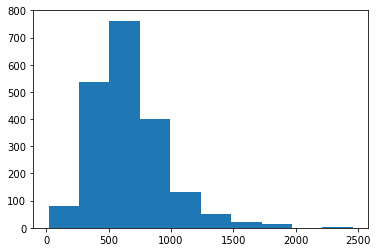

In [21]:
plt.hist(length)

##### vii. To represent each text (= data point), there are many ways. In NLP/Deep Learning terminology, this task is called tokenization. It is common to represent text using popularity/ rank of words in text. The most common word in the text will be represented as 1, the second most common word will be represented as 2, etc. Tokenize each text document using this method.

In [22]:
word_freq = pd.DataFrame(word_freq)
word_freq['represent number'] = 0
for i in range(len(word_freq)):
    word_freq['represent number'][i] = i

In [23]:
word_freq

,0,represent number
,479801.0,0
the,76529.0,1
and,35576.0,2
of,34123.0,3
a,38108.0,4
...,...,...
gyllenhall,2.0,39207
hindi,1.0,39208
vetter,1.0,39209
immuno,1.0,39210


##### viii. Select a review length L that 70% of the reviews have a length below it. If you feel more adventurous, set the threshold to 90%.

In [24]:
np.percentile(length, 70)

759.3

##### ix. Truncate reviews longer than L words and zero-pad reviews shorter than L so that all texts (= data points) are of length L.

In [25]:
whole_data['length'] = length

In [26]:
Truncate_whole_set = whole_data[whole_data['length'] < 759.3]

In [27]:
word_freq = word_freq.reset_index()
word_freq.columns = ['words', 'freq', 'represent number']

In [28]:
df_whole = pd.DataFrame(Truncate_whole_set['review'].str.split(' ')).reset_index().drop('index', axis=1)

In [29]:
Num_whole_set = []
for i in range(len(Truncate_whole_set)):
    df2 = pd.DataFrame(df_whole['review'][i])
    df2 = df2.replace(to_replace = list(word_freq['words']),value = list(word_freq['represent number']))
    df2 = df2[df2[0]!=0]
    df2 = df2[0].values.tolist()
    Num_whole_set.append(df2)

In [30]:
Num_whole_set = pd.DataFrame(Num_whole_set)
Num_whole_set = Num_whole_set.fillna(0)
Num_whole_set

,0,1,2,3,4,5,6,7,8,9,...,749,750,751,752,753,754,755,756,757,758
0,211,48,18,8,4,247,248,50,8,16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,340,24,339,8,432,433,6,52,49,434,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,131,728,779,4,593,211,778,6,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,91,221,62,161,1076,1075,948,1077,527,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2144,2191,5,49,2192,1,2131,2132,2133,2140,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,4,3555,3,3819,62,7078,13,15,14,683,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1396,343,9041,1582,154,15464,65,4,3392,661,343,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1397,13407,1577,8,1,6050,31,2540,26049,4195,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1398,729,6897,154,7861,754,154,1,39204,39203,13651,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### (c) Word Embeddings

##### i. One can use tokenized text as inputs to a deep neural network. However, a recent breakthrough in NLP suggests that more sophisticated representations of text yield better results. These sophisticated representations are called word embeddings. “Word embedding is a term used for representation of words for text analysis, typically in the form of a real-valued vector that encodes the meaning of the word such that the words that are closer in the vector space are expected to be similar in meaning.” Most deep learning modules (including Keras) provide a convenient way to convert positive integer representations of words into a word embedding by an “Embedding layer.” The layer accepts arguments that define the mapping of words into embeddings, including the maximum number of expected words also called the vocabulary size (e.g. the largest integer value). The layer also allows you to specify the dimension for each word vector, called the “output dimension.” We would like to use a word embedding layer for this project. Assume that we are interested in the top 5,000 words. This means that in each integer sequence that represents each document, we set to zero those integers that represent words that are not among the top 5,000 words in the document. If you feel more adventurous, use all the words that appear in this corpus. Choose the length of the embedding vector for each word to be 32. Hence, each document is represented as a 32 × L matrix.

In [31]:
Num_whole_set[Num_whole_set > 5000] = 0
Num_whole_set

,0,1,2,3,4,5,6,7,8,9,...,749,750,751,752,753,754,755,756,757,758
0,211,48,18,8,4,247,248,50,8,16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,340,24,339,8,432,433,6,52,49,434,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,131,728,779,4,593,211,778,6,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,91,221,62,161,1076,1075,948,1077,527,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2144,2191,5,49,2192,1,2131,2132,2133,2140,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,4,3555,3,3819,62,0,13,15,14,683,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1396,343,0,1582,154,0,65,4,3392,661,343,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1397,0,1577,8,1,0,31,2540,0,4195,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1398,729,0,154,0,754,154,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
Num_whole_data5000 = np.array(Num_whole_set).astype(int)

In [33]:
model = Sequential()
model.add(Embedding(5001, 32, input_length=759))

2022-07-26 14:26:41.686149: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [34]:
output_array_whole = model.predict(np.array(Num_whole_data5000))
output_array_whole.shape

44/44 [==============================] - 0s 2ms/step


(1400, 759, 32)

In [35]:
output_array_whole

array([[[ 0.00259569,  0.02768074, -0.00018419, ...,  0.03184338,
          0.0218347 ,  0.0375353 ],
        [-0.04962156, -0.02289253,  0.02575288, ...,  0.00885042,
          0.02593607, -0.00737177],
        [-0.03259841,  0.04989113, -0.02369815, ...,  0.03709881,
          0.03540025, -0.03875468],
        ...,
        [-0.02885747,  0.04521516,  0.04332782, ...,  0.03752861,
          0.03748882, -0.03122522],
        [-0.02885747,  0.04521516,  0.04332782, ...,  0.03752861,
          0.03748882, -0.03122522],
        [-0.02885747,  0.04521516,  0.04332782, ...,  0.03752861,
          0.03748882, -0.03122522]],

       [[ 0.0401021 ,  0.02497467,  0.02253545, ...,  0.02666571,
          0.02585876,  0.04705978],
        [-0.02749499, -0.01330737, -0.00429729, ...,  0.03179636,
          0.0287824 , -0.01339125],
        [-0.04585086, -0.02159567,  0.04832203, ...,  0.01252755,
          0.01398728,  0.04988604],
        ...,
        [-0.02885747,  0.04521516,  0.04332782, ...,  

In [36]:
train_set = whole_data.iloc[:1400]
test_set = whole_data.iloc[1400:]
Truncate_train_set = train_set[train_set['length'] < 759.3]
Truncate_test_set = test_set[test_set['length'] < 759.3]

In [37]:
df_train = pd.DataFrame(Truncate_train_set['review'].str.split(' ')).reset_index().drop('index', axis=1)
df_test = pd.DataFrame(Truncate_test_set['review'].str.split(' ')).reset_index().drop('index', axis=1)

In [38]:
Num_train_set = Num_whole_set.iloc[:991]
Num_test_set = Num_whole_set.iloc[991:]

X_train = np.array(Num_train_set).astype(int)
X_test = np.array(Num_test_set).astype(int)

y_train = Truncate_train_set['y']
y_test = Truncate_test_set['y']

In [39]:
model2 = Sequential()
model2.add(Embedding(5001, 32, input_length=759))

In [40]:
X_train = model2.predict(np.array(X_train))
X_train

31/31 [==============================] - 0s 1ms/step


array([[[-0.00216504, -0.00718103,  0.03416915, ..., -0.02517171,
          0.01732892,  0.00484704],
        [ 0.02112349, -0.00522206,  0.00323321, ..., -0.01871302,
         -0.04686619, -0.0001593 ],
        [-0.01601249, -0.03416531,  0.00979795, ..., -0.02229114,
         -0.00686778, -0.03327729],
        ...,
        [-0.03675704, -0.03498635, -0.01624339, ..., -0.00584795,
          0.0015322 ,  0.00912533],
        [-0.03675704, -0.03498635, -0.01624339, ..., -0.00584795,
          0.0015322 ,  0.00912533],
        [-0.03675704, -0.03498635, -0.01624339, ..., -0.00584795,
          0.0015322 ,  0.00912533]],

       [[-0.00839268, -0.04125232,  0.0356405 , ...,  0.0256269 ,
         -0.00870531,  0.01888131],
        [ 0.0437346 ,  0.03654002, -0.0467484 , ...,  0.03398604,
         -0.00250373,  0.03221243],
        [-0.00840569, -0.01055732, -0.03299376, ..., -0.01255123,
         -0.04240806, -0.01594251],
        ...,
        [-0.03675704, -0.03498635, -0.01624339, ..., -

In [41]:
X_test = model2.predict(np.array(X_test))
X_test

13/13 [==============================] - 0s 992us/step


array([[[-0.01144792, -0.01702   ,  0.03462261, ...,  0.04191   ,
          0.04091659,  0.01465794],
        [ 0.03570965,  0.00106177, -0.01420692, ...,  0.00862787,
          0.02130147, -0.04562652],
        [-0.01720103, -0.0129248 ,  0.01854545, ...,  0.03699848,
          0.02241892,  0.04778579],
        ...,
        [-0.03675704, -0.03498635, -0.01624339, ..., -0.00584795,
          0.0015322 ,  0.00912533],
        [-0.03675704, -0.03498635, -0.01624339, ..., -0.00584795,
          0.0015322 ,  0.00912533],
        [-0.03675704, -0.03498635, -0.01624339, ..., -0.00584795,
          0.0015322 ,  0.00912533]],

       [[-0.03675704, -0.03498635, -0.01624339, ..., -0.00584795,
          0.0015322 ,  0.00912533],
        [ 0.03744313,  0.04434112,  0.0370584 , ..., -0.04195363,
         -0.02637284, -0.00668135],
        [-0.03983171,  0.03353425, -0.04032286, ..., -0.04526197,
          0.02929338,  0.03142948],
        ...,
        [-0.03675704, -0.03498635, -0.01624339, ..., -

##### ii. Flatten the matrix of each document to a vector.

In [42]:
X_train_flatten = []
for i in range(len(X_train)):
    vec = X_train[i].flatten()
    X_train_flatten.append(vec)

In [43]:
X_test_flatten = []
for i in range(len(X_test)):
    vec = X_test[i].flatten()
    X_test_flatten.append(vec)

In [44]:
whole_flatten = []
for i in range(len(output_array_whole)):
    vec = output_array_whole[i].flatten()
    whole_flatten.append(vec)

### (d) Multi-Layer Perceptron

##### i. Train a MLP with three (dense) hidden layers each of which has 50 ReLUs and one output layer with a single sigmoid neuron. Use a dropout rate of 20% for the first layer and 50% for the other layers. Use ADAM optimizer and binary cross entropy loss (which is equivalent to having a softmax in the output). To avoid overfitting, just set the number of epochs as 2. Use a batch size of 10.

In [45]:
def create_model():
	# create model
	model3 = Sequential()
	model3.add(Dropout(0.2, input_shape=(24288,)))
	model3.add(Dense(50, activation='relu'))
	model3.add(Dropout(0.5))
	model3.add(Dense(50, activation='relu'))
	model3.add(Dropout(0.5))
	model3.add(Dense(50, activation='relu'))
	model3.add(Dropout(0.5))
	model3.add(Dense(1, activation='sigmoid'))
	# Compile model
	model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model3


In [46]:
estimator = KerasClassifier(build_fn=create_model, epochs=2, batch_size=10, verbose=0)

##### ii. Report the train and test accuracies of this model.

In [47]:
X_train_set = pd.DataFrame(X_train_flatten)
y_train_set = pd.DataFrame(y_train).reset_index().drop('index', axis = 1)

In [48]:
estimator.fit(X_train_set,y_train_set)

In [49]:
# train accuracy
y_pred = estimator.predict(X_train_set)
accuracy_score(y_train_set, y_pred)

31/31 [==============================] - 0s 2ms/step


0.5469223007063572

In [50]:
X_test_set = pd.DataFrame(X_test_flatten)
y_test_set = pd.DataFrame(y_test).reset_index().drop('index', axis = 1)

In [51]:
# test accuracy
y_pred = estimator.predict(X_test_set)
accuracy_score(y_test_set, y_pred)

13/13 [==============================] - 0s 3ms/step


0.5403422982885085

### (e) One-Dimensional Convolutional Neural Network:

##### Although CNNs are mainly used for image data, they can also be applied to text data, as text also has adjacency information. Keras supports one-dimensional convolutions and pooling by the Conv1D and MaxPooling1D classes respectively.

##### i. After the embedding layer, insert a Conv1D layer. This convolutional layer has 32 feature maps , and each of the 32 kernels has size 3, i.e. reads embedded word representations 3 vector elements of the word embedding at a time. The convolutional layer is followed by a 1D max pooling layer with a length and stride of 2 that halves the size of the feature maps from the convolutional layer. The rest of the network is the same as the neural network above.

In [52]:
def define_model():
	# create model
	inputs1 = Input(shape=(759,))
	embedding1 = Embedding(5001, 32)(inputs1)
	conv1 = Conv1D(filters=32, kernel_size=3, activation='relu')(embedding1)
	drop1 = Dropout(0.2)(conv1)
	pool1 = MaxPooling1D(pool_size=2, strides=2)(drop1)
	flat1 = Flatten()(pool1)
	dense1 = Dense(50, activation='relu')(flat1)
	drop2 = Dropout(0.5)(dense1)
	dense2 = Dense(50, activation='relu')(drop2)
	drop3 = Dropout(0.5)(dense2)
	dense3 = Dense(50, activation='relu')(drop3)
	drop4 = Dropout(0.5)(dense3)
	outputs = Dense(1, activation='sigmoid')(drop4)
	model_conv = Model(inputs=inputs1, outputs=outputs)
	model_conv.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model_conv

In [53]:
trainX = pd.DataFrame(np.array(Num_train_set).astype(int))
testX = pd.DataFrame(np.array(Num_test_set).astype(int))

In [54]:
estimator2 = KerasClassifier(build_fn=define_model, epochs=2, batch_size=10, verbose=0)

In [55]:
estimator2.fit(trainX,y_train_set)

##### ii. Report the train and test accuracies of this model.

In [56]:
# train accuracy
y_pred = estimator2.predict(trainX)
accuracy_score(y_train_set,y_pred)

31/31 [==============================] - 0s 4ms/step


0.5348133198789102

In [57]:
# test accuracy
y_pred = estimator2.predict(testX)
accuracy_score(y_test_set,y_pred)

13/13 [==============================] - 0s 3ms/step


0.5403422982885085

### (f) Long Short-Term Memory Recurrent Neural Network:

##### The structure of the LSTM we are going to use is shown in the following figure.

##### i. Each word is represented to LSTM as a vector of 32 elements and the LSTM is followed by a dense layer of 256 ReLUs. Use a dropout rate of 0.2 for both LSTM and the dense layer. Train the model using 10-50 epochs and batch size of 10.

In [58]:
from keras.layers import LSTM
def build_model():
	# create model
	model_LSTM = Sequential()
	model_LSTM.add(Embedding(5001, 32, input_length=759))
	model_LSTM.add(LSTM(32))
	model_LSTM.add(Dropout(0.2))
	model_LSTM.add(Dense(256, activation='relu'))
	model_LSTM.add(Dropout(0.2))
	model_LSTM.add(Dense(1, activation='sigmoid'))
	# Compile model
	model_LSTM.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model_LSTM

In [59]:
estimator3 = KerasClassifier(build_fn=build_model, epochs=10, batch_size=10, verbose=0)

In [60]:
estimator3.fit(trainX,y_train_set)

##### ii. Report the train and test accuracies of this model.

In [61]:
# train accuracy
y_pred = estimator3.predict(trainX)
accuracy_score(y_train_set,y_pred)

31/31 [==============================] - 1s 36ms/step


0.5378405650857719

In [62]:
# test accuracy
y_pred = estimator3.predict(testX)
accuracy_score(y_test_set,y_pred)

13/13 [==============================] - 0s 37ms/step


0.5403422982885085